## Common Libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [32]:
df = pd.read_csv('india_housing_prices.csv')
df.head(3)

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move


In [33]:
df.columns = df.columns.str.strip().str.lower()
df = df.drop(columns=["id", "price_per_sqft", "floor_no", "total_floors", "age_of_property"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   state                           250000 non-null  object 
 1   city                            250000 non-null  object 
 2   locality                        250000 non-null  object 
 3   property_type                   250000 non-null  object 
 4   bhk                             250000 non-null  int64  
 5   size_in_sqft                    250000 non-null  int64  
 6   price_in_lakhs                  250000 non-null  float64
 7   year_built                      250000 non-null  int64  
 8   furnished_status                250000 non-null  object 
 9   nearby_schools                  250000 non-null  int64  
 10  nearby_hospitals                250000 non-null  int64  
 11  public_transport_accessibility  250000 non-null  object 
 12  parking_space   

In [34]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   state                           250000 non-null  object 
 1   city                            250000 non-null  object 
 2   locality                        250000 non-null  object 
 3   property_type                   250000 non-null  object 
 4   bhk                             250000 non-null  int64  
 5   size_in_sqft                    250000 non-null  int64  
 6   price_in_lakhs                  250000 non-null  float64
 7   year_built                      250000 non-null  int64  
 8   furnished_status                250000 non-null  object 
 9   nearby_schools                  250000 non-null  int64  
 10  nearby_hospitals                250000 non-null  int64  
 11  public_transport_accessibility  250000 non-null  object 
 12  parking_space   

In [35]:
cat_cols = df.select_dtypes(include=["object", "category"])
cat_unique_counts = cat_cols.nunique(dropna=True)
cat_unique_counts

state                              20
city                               42
locality                          500
property_type                       3
furnished_status                    3
public_transport_accessibility      3
parking_space                       2
security                            2
amenities                         325
facing                              4
owner_type                          3
availability_status                 2
dtype: int64

In [36]:
binary_cols = df.nunique(dropna=True)
binary_cols = binary_cols[binary_cols == 2].index.tolist()
binary_cols

['parking_space', 'security', 'availability_status']

In [88]:
df.groupby("city")["price_in_lakhs"].agg(["min", "median", "max", "count"])

,min,median,max,count
city,,,,
Ahmedabad,10.04,255.560,499.89,6411
Amritsar,10.04,251.710,499.96,6221
Bangalore,10.11,258.360,499.94,4144
Bhopal,10.08,258.230,499.86,6284
Bhubaneswar,10.00,252.960,499.79,6323
Bilaspur,10.07,251.350,499.91,6263
Chennai,10.04,256.915,499.95,6168
Coimbatore,10.03,255.680,499.91,6461
Cuttack,10.03,248.205,499.95,6358


## EDA

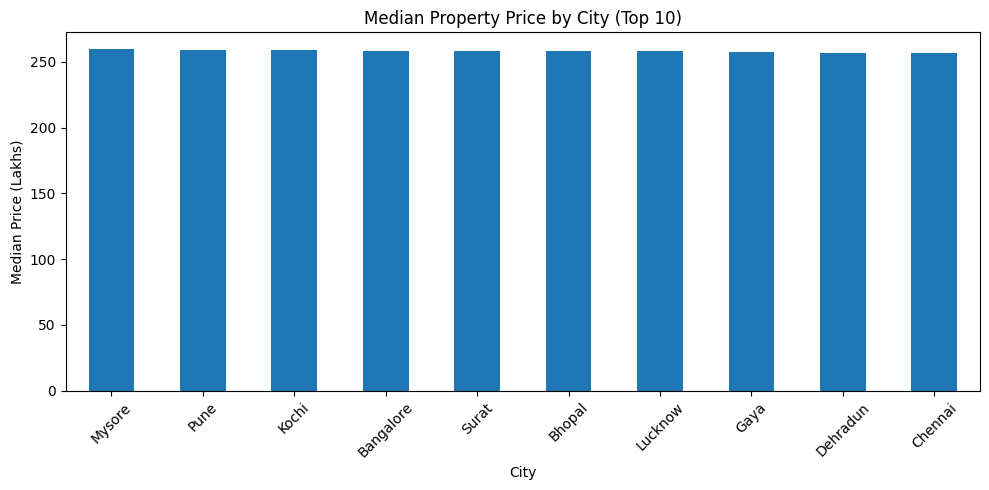

In [87]:
city_price = (
    df.groupby("city")["price_in_lakhs"]
      .median()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10, 5))
city_price.plot(kind="bar")
plt.xlabel("City")
plt.ylabel("Median Price (Lakhs)")
plt.title("Median Property Price by City (Top 10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Feature Engineering

In [37]:
from datetime import datetime
current_year = datetime.now().year
df["size_in_sqft"] = df["size_in_sqft"].replace(0, np.nan)

df['property_age'] = current_year - df['year_built']

df["price_median"] = df.groupby(
    ["state"]
)["price_in_lakhs"].transform("median")

df["price_flag"] = (df["price_in_lakhs"] <= df["price_median"]).astype(int)

df["price_per_sqft"] = df["price_in_lakhs"]*100000/df['size_in_sqft']

df['city_median_ppsf'] = (df.groupby(['city', 'locality'])['price_per_sqft'].transform('median'))

df["pps_flag"] = (df["price_per_sqft"] <= df["city_median_ppsf"]).astype(int)

df["bhk_flag"] = (df["bhk"] >= 3).astype(int)
df["ready_flag"] = (df["availability_status"] == "Ready_to_Move").astype(int)
df["age_flag"] = (df["property_age"] <= 10).astype(int)

df["investment_score"] = (
    0.3 * df["price_flag"] +
    0.4 * df["pps_flag"] +
    0.1 * df["bhk_flag"] +
    0.1 * df["ready_flag"]+
    0.1 * df["age_flag"]
)

df["good_investment"] = (df["investment_score"] >= 0.6).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   state                           250000 non-null  object 
 1   city                            250000 non-null  object 
 2   locality                        250000 non-null  object 
 3   property_type                   250000 non-null  object 
 4   bhk                             250000 non-null  int64  
 5   size_in_sqft                    250000 non-null  int64  
 6   price_in_lakhs                  250000 non-null  float64
 7   year_built                      250000 non-null  int64  
 8   furnished_status                250000 non-null  object 
 9   nearby_schools                  250000 non-null  int64  
 10  nearby_hospitals                250000 non-null  int64  
 11  public_transport_accessibility  250000 non-null  object 
 12  parking_space   

In [50]:
num_features = [
    "bhk", "size_in_sqft", "price_in_lakhs", "price_per_sqft",
    "property_age", "nearby_schools", "nearby_hospitals"
]

binary_features = [
    "parking_space",
    "security"
]

ordinal_features = [
    "public_transport_accessibility"
]

ordinal_categories = [
    ["Low", "Medium", "High"]
]

cat_features = [
    "property_type", "furnished_status", "facing",
    "owner_type", "availability_status"
]

high_card_features = [
    "city", "locality", "amenities"
]


## Train-Test Split

In [63]:
y = df["good_investment"]
X = df[num_features + binary_features + ordinal_features + cat_features + high_card_features]

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from category_encoders.target_encoder import TargetEncoder

#First split Train+Temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    stratify=y_temp,
    random_state=42
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),

        ("bin", OrdinalEncoder(
            categories=[["No", "Yes"], ["No", "Yes"]],
            handle_unknown="use_encoded_value",
            unknown_value=-1
        ), binary_features),

        ("ord", OrdinalEncoder(
            categories=ordinal_categories,
            handle_unknown="use_encoded_value",
            unknown_value=-1
        ), ordinal_features),

        ("cat", OneHotEncoder(handle_unknown="ignore"),
         cat_features),

        ("high_card", TargetEncoder(),
         high_card_features)
    ],
    remainder="drop"
)



In [64]:
model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    solver="liblinear"
)

pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("model", model)
    ]
)


In [65]:
Xt = preprocessor.fit_transform(X_train, y_train)
Xt.shape

(175000, 28)

In [66]:
pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('bin', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transform

In [67]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.91      0.89      0.90     20512
           1       0.87      0.90      0.89     16988

    accuracy                           0.89     37500
   macro avg       0.89      0.90      0.89     37500
weighted avg       0.90      0.89      0.90     37500

ROC AUC: 0.9646079696937582


In [68]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[18286,  2226],
       [ 1715, 15273]])

In [69]:
y_val_proba = pipeline.predict_proba(X_val)[:, 1]

In [71]:
from sklearn.metrics import precision_recall_curve
import numpy as np

precision, recall, thresholds = precision_recall_curve(y_val, y_val_proba)

target_precision = 0.90

valid_idx = np.where(precision[:-1] >= target_precision)[0]

best_idx = valid_idx[0]   # highest recall among valid
best_threshold = thresholds[best_idx]

best_threshold


np.float64(0.5813601412778326)

In [72]:
y_test_proba = pipeline.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= best_threshold).astype(int)


In [73]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("ROC AUC:", roc_auc_score(y_test, y_test_proba))


[[18822  1690]
 [ 2140 14848]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     20512
           1       0.90      0.87      0.89     16988

    accuracy                           0.90     37500
   macro avg       0.90      0.90      0.90     37500
weighted avg       0.90      0.90      0.90     37500

ROC AUC: 0.9646079696937582
